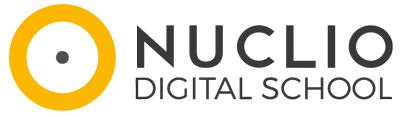

## **Proyecto Health Analytics para el estudio de la salud pública**

**DESCRIPCIÓN DEL PROYECTO**


Análisis en países desarrollados y subdesarrollados de la relación entre la esperanza de vida, las principales causas de muerte, el gasto en salud, el PIB per cápita, tasas de vacunación, niveles de pobreza, y las tasas de homicidios y suicidios en diferentes países. Este proyecto busca entender cómo los factores socioeconómicos y de salud pública influyen en la calidad y expectativa de vida a nivel global. Además, los resultados del análisis se complementarán con la implementación de un modelo simple que ayude a entender los factores de vida que impactan en la esperanza de vida de un país,  y diseñar un dashboard para la WHO con los principales resultados del análisis. 


### 1) Import libraries

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2) Paths & directories

In [2]:
data_folder = 'data/'

annual_number_of_deaths_by_cause_path = data_folder + 'annual_number_of_deaths_by_cause.csv'
death_rate_from_suicides_gho_path = data_folder + 'death_rate_from_suicides_gho.csv'
gdp_per_capita_penn_world_table_path = data_folder + 'gdp_per_capita_penn_world_table.csv'
global_vaccination_coverage_path = data_folder + 'global_vaccination_coverage.csv'
homicide_rate_unodc_path = data_folder + 'homicide_rate_unodc.csv'
life_expectancy_path = data_folder + 'life_expectancy.csv'
poverty_explorer_path = data_folder + 'poverty_explorer.csv'
public_healthcare_spending_share_gdp_path = data_folder + 'public_healthcare_spending_share_gdp.csv'


### 3) Quick data exploration 

In [8]:
# Dataset for deaths
print("Dataset for deaths ")
df_deaths = pd.read_csv(annual_number_of_deaths_by_cause_path)
print(f'Shape of the dataset for deaths: {df_deaths.shape}')

print(f'\nNumber of countries in the data: {df_deaths["Code"].nunique()}')
print(f'Number of years available in the data: {df_deaths["Year"].nunique()}')

display(df_deaths.head())


Dataset for deaths 
Shape of the dataset for deaths: (6840, 34)

Number of countries in the data: 205
Number of years available in the data: 30


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [9]:
# Dataset for suicides
print("Dataset for suicides ")
df_suicides = pd.read_csv(death_rate_from_suicides_gho_path)
print(f'Shape of the dataset for deaths: {df_suicides.shape}')

print(f'\nNumber of countries in the data: {df_suicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_suicides["Year"].nunique()}')

display(df_suicides.head())


Dataset for suicides 
Shape of the dataset for deaths: (3880, 4)

Number of countries in the data: 184
Number of years available in the data: 20


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Afghanistan,AFG,2000,7.71
1,Afghanistan,AFG,2001,7.89
2,Afghanistan,AFG,2002,7.85
3,Afghanistan,AFG,2003,7.72
4,Afghanistan,AFG,2004,7.77


In [10]:
# Dataset for GDP_per_capita
print("Dataset for GDP")
df_gdp = pd.read_csv(gdp_per_capita_penn_world_table_path)
print(f'Shape of the dataset for GDP: {df_gdp.shape}')

print(f'\nNumber of countries in the data: {df_gdp["Code"].nunique()}')
print(f'Number of years available in the data: {df_gdp["Year"].nunique()}')

display(df_gdp.head())


Dataset for GDP
Shape of the dataset for GDP: (10108, 4)

Number of countries in the data: 182
Number of years available in the data: 70


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730


In [11]:
# Dataset for vaccination
print("Dataset for vaccination")
df_vaccination = pd.read_csv(global_vaccination_coverage_path)
print(f'Shape of the dataset for vaccination: {df_vaccination.shape}')

print(f'\nNumber of countries in the data: {df_vaccination["Code"].nunique()}')
print(f'Number of years available in the data: {df_vaccination["Year"].nunique()}')

display(df_vaccination.head())


Dataset for vaccination
Shape of the dataset for vaccination: (7897, 14)

Number of countries in the data: 196
Number of years available in the data: 42


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


In [13]:
# Dataset for homicides
print("Dataset for homicides")
df_homicides = pd.read_csv(homicide_rate_unodc_path)
print(f'Shape of the dataset for homicides: {df_homicides.shape}')

print(f'\nNumber of countries in the data: {df_homicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_homicides["Year"].nunique()}')

display(df_homicides.head())


Dataset for homicides
Shape of the dataset for homicides: (4204, 4)

Number of countries in the data: 201
Number of years available in the data: 32


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262


In [17]:
# Dataset for life_expectancy
print("Dataset for life expectancies")
df_life_expec = pd.read_csv(life_expectancy_path)
print(f'Shape of the dataset for life expectancies: {df_life_expec.shape}')

#print(f'\nNumber of countries in the data: {df_life_expec["Code"].nunique()}')
#print(f'Number of years available in the data: {df_life_expec["Year"].nunique()}')

display(df_life_expec.head())


Dataset for life expectancies
Shape of the dataset for life expectancies: (20755, 4)


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


In [21]:
# Dataset for poverty
print("Dataset for poverty")
df_poverty = pd.read_csv(poverty_explorer_path)
print(f'Shape of the dataset for poverty: {df_poverty.shape}')

print(f'\nNumber of countries in the data: {df_poverty["Country"].nunique()}')
print(f'Number of years available in the data: {df_poverty["Year"].nunique()}')


display(df_poverty.head())


Dataset for life poverty
Shape of the dataset for poverty: (2602, 109)

Number of countries in the data: 192
Number of years available in the data: 60


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,1819,16944,281906,1516827,2395790,3126915,3164783,3166501,2.768821,7.548123,14.802514,87717,239127,468949,7.933157,6.972103,3.691232,13.164797,0.119104,0.270103,0.241293,3.863286,5.289347,6.378684,7.322042,8.379662,9.354903,10.823087,12.473869,14.899548,21.215572,4.687306,5.399629,6.228325,6.971433,8.039671,9.178580,10.682603,14.954244,17.344930,19.693201,0.414055,1.309217,2.915092,0.417050,0.604653,0.823818,36582.383,144588.90,386328.72,3.924362,38.960340,61.430424,18.363249,73.68916,18.084910,80.22638,28.927036,0.002253,29.463327,60.633118,0.098215,73.61356,1.609277,80.187584,13.850017,0.039244,3.896034,12.286085,0.394810,22.106749,0.660099,32.090553,1.981502,71.384155,9334079.0,38417544.0,6689.6580,69963064.0,186085.92,101614760.0,3005595.8,3.064805,4.196122,5.060310,5.808691,6.647718,7.421392,8.586125,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,1415,33337,347459,1589301,2340279,2945105,3018917,3043749,3.212283,8.406373,16.020554,98007,256479,488789,8.108229,6.688141,3.501889,13.990763,0.164812,0.317390,0.268982,3.494002,4.859444,5.842059,6.738204,7.653102,8.839459,10.228584,11.984428,14.925079,25.435638,4.370816,5.093828,5.858262,6.687111,7.662466,8.913951,10.652152,17.543550,18.595226,20.580732,0.563548,1.563182,3.297149,0.469335,0.621838,0.825881,45998.117,159488.27,403681.56,43.873215,41.387882,63.137640,17.337124,74.09592,19.966413,80.05450,31.078033,0.020348,31.

In [23]:
# Dataset for public healthcare spending
print("Dataset for public healthcare spending")
df_public_health_spend = pd.read_csv(public_healthcare_spending_share_gdp_path)
print(f'Shape of the dataset for poverty: {df_public_health_spend.shape}')

print(f'\nNumber of countries in the data: {df_public_health_spend["Code"].nunique()}')
print(f'Number of years available in the data: {df_public_health_spend["Year"].nunique()}')


display(df_public_health_spend.head())


Dataset for public healthcare spending
Shape of the dataset for poverty: (4014, 4)

Number of countries in the data: 191
Number of years available in the data: 20


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840
